In [1]:
import NCrystal as NC
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
NC.__version__

'3.2.0'

In [3]:
const_hhm = 4.144249671718981e-3 # hbar^2/neutron_mass, eV*Aa^2

In [4]:
T = 2 # temperature 

In [5]:
E  = np.logspace(-7,0,1000)

## $O_2$ magnetic cross sections

In [6]:
O2_down = NC.createScatter('ncplugin-MagScat_O2_sg223_SolidOxygen-gamma_mag_down.ncmat;temp={}K;inelas=0;elas=0'.format(T))
O2_up   = NC.createScatter('ncplugin-MagScat_O2_sg223_SolidOxygen-gamma_mag_up.ncmat;temp={}K;inelas=0;elas=0'.format(T))
O2_mela = NC.createScatter('ncplugin-MagScat_O2_sg223_SolidOxygen-gamma_mag_elas.ncmat;temp={}K;inelas=0;elas=0'.format(T))
O2_mag  = NC.createScatter('ncplugin-MagScat_O2_sg223_SolidOxygen-gamma_mag.ncmat;temp={}K;inelas=0;elas=0'.format(T))
xs_down = O2_down.crossSectionIsotropic(E)
xs_up   = O2_up.crossSectionIsotropic(E)
xs_mela = O2_mela.crossSectionIsotropic(E)
xs_mag = O2_mag.crossSectionIsotropic(E)

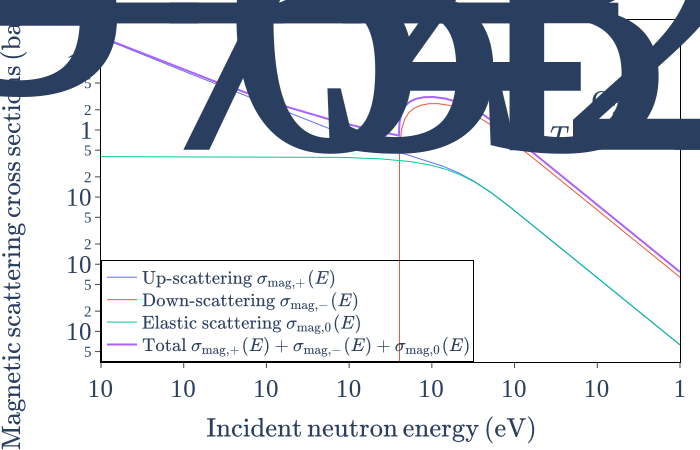

In [7]:
fig = make_subplots(rows = 1, cols = 1)

fig.add_trace(
    go.Scatter(
        x = E,
        y = xs_up,
        mode = 'lines',
        line_width=1,
        name = r'$\textrm{Up-scattering }\sigma_{\textrm{mag},+}(E)$',
    ),
    row = 1, col = 1
)
fig.add_trace(
    go.Scatter(
        x = E,
        y = xs_down,
        mode = 'lines',
        line_width=1,
        name = r'$\textrm{Down-scattering }\sigma_{\textrm{mag},-}(E)$',
    ),
    row = 1, col = 1
)
fig.add_trace(
    go.Scatter(
        x = E,
        y = xs_mela,
        mode = 'lines',
        line_width=1,
        name = r'$\textrm{Elastic scattering }\sigma_{\textrm{mag},0}(E)$',
    ),
    row = 1, col = 1
)
fig.add_trace(
    go.Scatter(
        x = E,
        y = xs_mag,
        mode = 'lines',
        name = r'$\textrm{Total }\sigma_{\textrm{mag},+}(E)+\sigma_{\textrm{mag},-}(E)+\sigma_{\textrm{mag},0}(E)$',
    ),
    row = 1, col = 1
)

fig.update_xaxes(tickfont = dict(size = 20), linecolor = 'black', mirror = True, 
                 ticks = 'outside', exponentformat = 'power', row = 1, col = 1, 
                 type = 'log', title = r'$\Large \textrm{Incident neutron energy (eV)}$',
                 showgrid=True, gridwidth=.01, gridcolor='grey')
fig.update_yaxes(tickfont = dict(size = 20), linecolor = 'black', mirror = True, 
                 ticks = 'outside', exponentformat = 'power', row = 1, col = 1, 
                 type = 'log', title = r'$\Large \textrm{Magnetic scattering cross sections (barn)}$',
                 showgrid=True, gridwidth=.01, gridcolor='grey')
fig.add_annotation(xref='paper',yref='paper',x=.9, y=.8, 
                   text=r'$\Large \textrm{O}_2$', showarrow=False,font = dict(size = 28))
fig.add_annotation(xref='paper',yref='paper',x=.94, y=.7, 
                   text=r'$\Large T=2\textrm{ K}$', showarrow=False)
fig.update_layout(
    paper_bgcolor = 'rgba(0,0,0,0)',
    plot_bgcolor = 'rgba(0,0,0,0)',
    font = dict(family = 'Times new roman', size = 24),
    legend = dict(x = 0., y = 0., bordercolor = "Black", borderwidth = 1, font = dict(size = 18)),
    margin = dict(l = 80, r = 20, t = 20, b = 60),
)
fig.show('svg')

## THF/TDF-clathrate cross sections

In [8]:
cla_H_scat = NC.createScatter('ncplugin-MagScat_136H2O_8THF_sg227_ClathrateHydrates-sII.ncmat;temp={}K'.format(T))
cla_H_abs  = NC.createAbsorption('ncplugin-MagScat_136H2O_8THF_sg227_ClathrateHydrates-sII.ncmat;temp={}K'.format(T))
xs_H_scat = cla_H_scat.crossSectionNonOriented(E)
xs_H_abs  = cla_H_abs.crossSectionNonOriented(E)

In [9]:
cla_D_scat = NC.createScatter('ncplugin-MagScat_136D2O_8TDF_sg227_ClathrateHydrates-sII.ncmat;temp={}K'.format(T))
cla_D_abs  = NC.createAbsorption('ncplugin-MagScat_136D2O_8TDF_sg227_ClathrateHydrates-sII.ncmat;temp={}K'.format(T))
xs_D_scat = cla_D_scat.crossSectionNonOriented(E)
xs_D_abs  = cla_D_abs.crossSectionNonOriented(E)

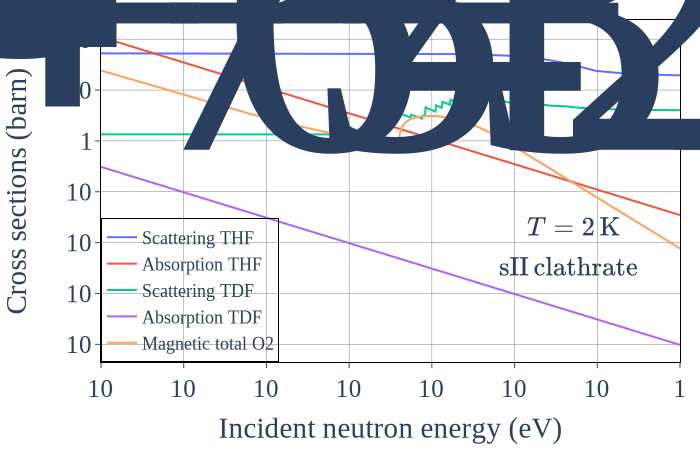

In [10]:
fig = make_subplots(rows = 1, cols = 1)
fig.add_trace(
    go.Scatter(
        x = E,
        y = xs_H_scat,
        mode = 'lines',
        name = 'Scattering THF',
    ),
    row = 1, col = 1
)
fig.add_trace(
    go.Scatter(
        x = E,
        y = xs_H_abs,
        mode = 'lines',
        name = 'Absorption THF',
    ),
    row = 1, col = 1
)
fig.add_trace(
    go.Scatter(
        x = E,
        y = xs_D_scat,
        mode = 'lines',
        name = 'Scattering TDF',
    ),
    row = 1, col = 1
)
fig.add_trace(
    go.Scatter(
        x = E,
        y = xs_D_abs,
        mode = 'lines',
        name = 'Absorption TDF',
    ),
    row = 1, col = 1
)
fig.add_trace(
    go.Scatter(
        x = E,
        y = xs_mag,
        mode = 'lines',
        name = 'Magnetic total O2',
    ),
    row = 1, col = 1
)
fig.update_xaxes(tickfont = dict(size = 20), linecolor = 'black', mirror = True, 
                 ticks = 'outside', exponentformat = 'power', row = 1, col = 1, 
                 type = 'log', title = 'Incident neutron energy (eV)', 
                 showgrid=True, gridwidth=.5, gridcolor='grey')
fig.update_yaxes(tickfont = dict(size = 20), linecolor = 'black', mirror = True, 
                 ticks = 'outside', exponentformat = 'power', row = 1, col = 1, 
                 type = 'log', title = 'Cross sections (barn)',
                 showgrid=True, gridwidth=.5, gridcolor='grey')
fig.add_annotation(xref='paper',yref='paper',x=.9, y=.4, 
                   text=r'$\Large T=2\textrm{ K}$', showarrow=False)
fig.add_annotation(xref='paper',yref='paper',x=.93, y=.25, 
                   text=r'$\Large \textrm{sII clathrate}$', showarrow=False)
fig.update_layout(
    paper_bgcolor = 'rgba(0,0,0,0)',
    plot_bgcolor = 'rgba(0,0,0,0)',
    font = dict(family = 'Times new roman', size = 24),
    legend = dict(x = 0., y = 0., bordercolor = "Black", borderwidth = 1, font = dict(size = 18)),
    margin = dict(l = 80, r = 20, t = 20, b = 60),
)
fig.show('svg')

## THF/TDF-clathrate scattering kernels

In [11]:
THF_info = NC.createInfo('ncplugin-MagScat_136H2O_8THF_sg227_ClathrateHydrates-sII.ncmat;temp={}K'.format(T))
di = THF_info.dyninfos[0]
kernel = di.loadKernel()
alpha = kernel[ 'alpha' ]
beta  = kernel[ 'beta' ]
sab   = kernel[ 'sab' ]
sab   = np.reshape(sab, (len(beta), len(alpha)))

# convert to S(Q,omega)
a = THF_info.getAtomInfo()[0]
A = a.atomData.averageMassAMU() / NC.const_neutron_mass_amu
alphaQ_conv = const_hhm / (2 * A * NC.constant_boltzmann * T)
Q = np.sqrt(alpha / alphaQ_conv)
hbar_omega = -beta * NC.constant_boltzmann * T # eV

THF_Qs   = np.copy(Q)
THF_hws  = np.copy(hbar_omega)
THF_SQws = np.copy(sab)

<ipython-input-12-2222e2584e72>:8: RuntimeWarning:

divide by zero encountered in log10



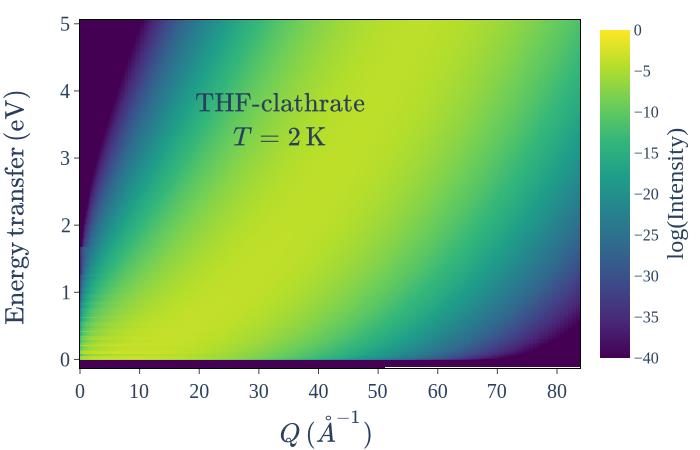

In [12]:
# Create figure
fig = make_subplots(
    rows=1, cols=1,
)

fig.add_trace(
    go.Heatmap(
        z=np.log10(THF_SQws),
        x=THF_Qs,
        y=THF_hws,
        coloraxis = "coloraxis",
        name = '2 K',
    ),
    row = 1, col = 1
)

fig.update_xaxes(tickfont = dict(size = 20), linecolor = 'black', mirror = True, 
                 ticks = 'outside', \
                 nticks = 10,
                 #range = [0, 6],
                 title = r'$\Large Q\textrm{ (}{\mathring A}^{-1}\textrm{)}$',
                 showgrid=True, gridwidth=.1, gridcolor='grey',)

fig.update_yaxes(tickfont = dict(size = 20), linecolor = 'black', mirror = True, \
                 ticks = 'outside', \
                 #range = [-5, 22],
                 title = r'$\Large \textrm{Energy transfer (eV)}$',
                 showgrid=True, gridwidth=.1, gridcolor='grey',
                 row = 1, col = 1)

fig.update_layout(
    paper_bgcolor = 'rgba(0,0,0,0)',
    plot_bgcolor = 'rgba(0,0,0,0)',
    coloraxis = {'colorscale':'viridis', 'colorbar_tickfont_size':16, 'cmin':-40, 'cmax':0},
    font = dict(family = 'Times new roman', size = 24),
    legend = dict(x = 0., y = 1., bordercolor = "Black", borderwidth = 1, font = dict(size = 18)),
    showlegend = True,
    annotations=[dict(
          # Don't specify y position,because yanchor="middle" do it for you
          x=1.22,
          align="right",
          valign="top",
          text='log(Intensity)',
          showarrow=False,
          xref="paper",
          yref="paper",
          xanchor="right",
          yanchor="middle",
          # Parameter textangle allow you to rotate annotation how you want
          textangle=-90
        ),
                 dict(
                     xref='paper',yref='paper',x=.4, y=.8, 
                     text=r'$\Large \textrm{THF-clathrate}$', showarrow=False
                 ),
                 dict(
                     xref='paper',yref='paper',x=.4, y=.7, 
                     text=r'$\Large T=2 \textrm{ K}$', showarrow=False
                 ),
    ],
    margin = dict(l = 80, r = 120, t = 20, b = 60),
)

fig.show('svg')

In [13]:
TDF_info = NC.createInfo('ncplugin-MagScat_136D2O_8TDF_sg227_ClathrateHydrates-sII.ncmat;temp={}K'.format(T))
di = TDF_info.dyninfos[0]
kernel = di.loadKernel()
alpha = kernel[ 'alpha' ]
beta  = kernel[ 'beta' ]
sab   = kernel[ 'sab' ]
sab   = np.reshape(sab, (len(beta), len(alpha)))

# convert to S(Q,omega)
a = TDF_info.getAtomInfo()[0]
A = a.atomData.averageMassAMU() / NC.const_neutron_mass_amu
alphaQ_conv = const_hhm / (2 * A * NC.constant_boltzmann * T)
Q = np.sqrt(alpha / alphaQ_conv)
hbar_omega = -beta * NC.constant_boltzmann * T # eV

TDF_Qs   = np.copy(Q)
TDF_hws  = np.copy(hbar_omega)
TDF_SQws = np.copy(sab)

<ipython-input-14-bb6fb0103e49>:8: RuntimeWarning:

divide by zero encountered in log10



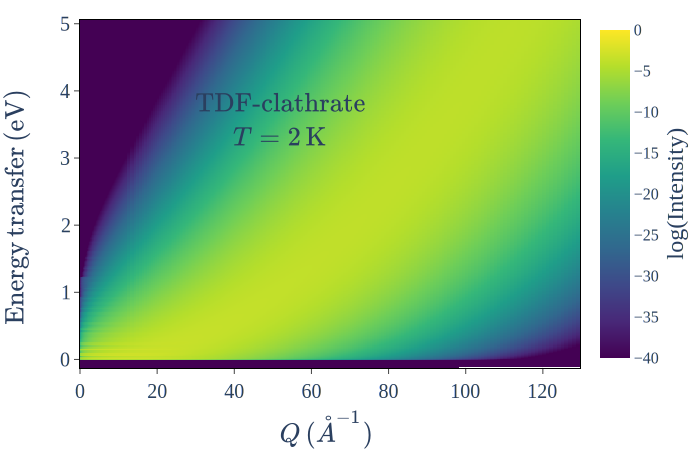

In [14]:
# Create figure
fig = make_subplots(
    rows=1, cols=1,
)

fig.add_trace(
    go.Heatmap(
        z=np.log10(TDF_SQws),
        x=TDF_Qs,
        y=TDF_hws,
        coloraxis = "coloraxis",
        name = '1.5 K',
    ),
    row = 1, col = 1
)

fig.update_xaxes(tickfont = dict(size = 20), linecolor = 'black', mirror = True, 
                 ticks = 'outside', \
                 nticks = 10,
                 #range = [0, 6],
                 title = r'$\Large Q\textrm{ (}{\mathring A}^{-1}\textrm{)}$',
                 showgrid=True, gridwidth=.1, gridcolor='grey',)

fig.update_yaxes(tickfont = dict(size = 20), linecolor = 'black', mirror = True, \
                 ticks = 'outside', \
                 #range = [-5, 22],
                 title = r'$\Large \textrm{Energy transfer (eV)}$',
                 showgrid=True, gridwidth=.1, gridcolor='grey',
                 row = 1, col = 1)

fig.update_layout(
    paper_bgcolor = 'rgba(0,0,0,0)',
    plot_bgcolor = 'rgba(0,0,0,0)',
    coloraxis = {'colorscale':'viridis', 'colorbar_tickfont_size':16, 'cmin':-40, 'cmax':0},
    font = dict(family = 'Times new roman', size = 24),
    legend = dict(x = 0., y = 1., bordercolor = "Black", borderwidth = 1, font = dict(size = 18)),
    showlegend = True,
    annotations=[dict(
          # Don't specify y position,because yanchor="middle" do it for you
          x=1.22,
          align="right",
          valign="top",
          text='log(Intensity)',
          showarrow=False,
          xref="paper",
          yref="paper",
          xanchor="right",
          yanchor="middle",
          # Parameter textangle allow you to rotate annotation how you want
          textangle=-90
        ),
                 dict(
                     xref='paper',yref='paper',x=.4, y=.8, 
                     text=r'$\Large \textrm{TDF-clathrate}$', showarrow=False
                 ),
                 dict(
                     xref='paper',yref='paper',x=.4, y=.7, 
                     text=r'$\Large T=2 \textrm{ K}$', showarrow=False
                 ),
    ],
    margin = dict(l = 80, r = 120, t = 20, b = 60),
)

fig.show('svg')